In [1]:
import matplotlib.pyplot as plt
import torch

from diffusion.schedule import (CosineScheduler, LinearScheduler,
                                QuadraticScheduler, SigmoidScheduler)

In [2]:
TIME_STEPS = 100
t = torch.linspace(0.0, 1.0, TIME_STEPS)

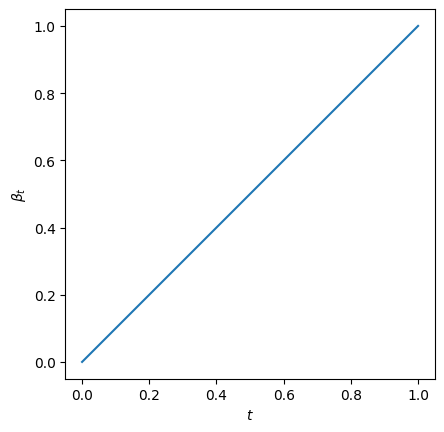

In [3]:
# Linear scheduler
scheduler = LinearScheduler()

plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, scheduler(t))

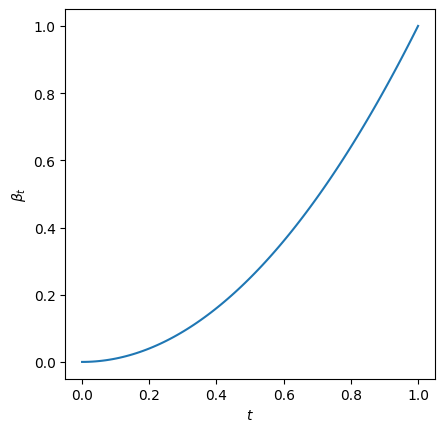

In [14]:
# Quadratic scheduler
plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.gca().set_aspect('equal', adjustable='box')
scheduler = QuadraticScheduler()
plt.plot(t, t ** 2)

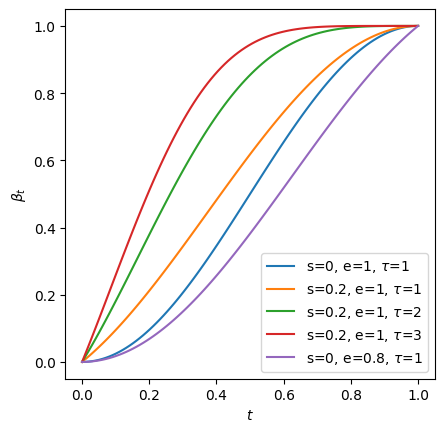

In [5]:
# Cosine scheduler
variants = [
    { 'start': 0, 'end': 1, 'tau': 1 },
    { 'start': 0.2, 'end': 1, 'tau': 1 },
    { 'start': 0.2, 'end': 1, 'tau': 2 },
    { 'start': 0.2, 'end': 1, 'tau': 3 },
    { 'start': 0, 'end': 0.8, 'tau': 1 },
]

plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.gca().set_aspect('equal', adjustable='box')
for variant in variants:
    scheduler = CosineScheduler(**variant)
    plt.plot(t, scheduler(t), label=f"s={variant['start']}, e={variant['end']}, $\\tau$={variant['tau']}")
plt.legend()

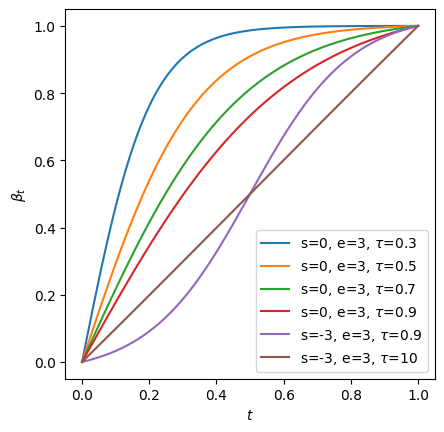

In [6]:
# Sigmoid scheduler
variants = [
    { 'start': 0, 'end': 3, 'tau': 0.3 },
    { 'start': 0, 'end': 3, 'tau': 0.5 },
    { 'start': 0, 'end': 3, 'tau': 0.7 },
    { 'start': 0, 'end': 3, 'tau': 0.9 },
    { 'start': -3, 'end': 3, 'tau': 0.9 },
    { 'start': -3, 'end': 3, 'tau': 10 },
]

plt.xlabel('$t$')
plt.ylabel('$\\beta_t$')
plt.gca().set_aspect('equal', adjustable='box')
for variant in variants:
    scheduler = SigmoidScheduler(**variant)
    plt.plot(t, scheduler(t), label=f"s={variant['start']}, e={variant['end']}, $\\tau$={variant['tau']}")
plt.legend()
